# NUPACK tutorial

In order to use this notebook, download the latest version of the package [here](https://nupack.org/download/overview) (you will need to register). Installation instructions are [here]. On Mac/Linux it should be enough to unzip the file and run the following command:

```bash
python3 -m pip install -U nupack -f ~/Downloads/nupack-VERSION/package
```

where you will have to adjust the path to match the location where you unzipped the folder.

This tutorial has been adapted from the [official NUPACK documentation](https://nbviewer.org/github/Piercelab-Caltech/nupack-docs/blob/main/examples/analysis/tube-analysis.ipynb).

Here we will analyze a test tube containing 2 strand species that interact to form all complex species of up to 4 strands. We set the concentrations of both strands to $5 \times 10^{-6}$ M, the material to `DNA' and the temperature to $23^\circ$ C.

The two strands are intended to form a bipedal walker complex '(a+b)' with a duplex torso and single-stranded legs (see [Shin and Pierce, J Am Chem Soc, 2004](https://doi.org/10.1021/ja047543j)).

Here we calculate the partition function, equilibrium pair probability matrix, MFE proxy structure(s), and equilibrium concentration for each complex species in the tube, as well as the ensemble pair fractions for the tube ensemble.

In [3]:
# Import NUPACK Python module
from nupack import *

In [4]:
# Define physical model
my_model = Model(material='dna', celsius=23)

# Define strand species
a = Strand('GGCTGGTTTCTGCTCTCTAGTTCGCGAGGTGCAATCTCCTATC', name='a')
b = Strand('GTCTGGGATGCTGGATACTGAACCTAGAGAGCAGAAACCAGCC', name='b')

# Define tube ensemble containing strands at specified concentrations 
# interacting to form all complexes up to 4 strands
t1 = Tube(strands={a:5e-6, b:5e-6}, complexes=SetSpec(max_size=4), name='Tube t1')

# Analyze the tube ensemble
# Calculate pfunc (default), pairs, mfe, concentration (default) for each complex 
# Since pairs is specified, calculate ensemble pair fractions for the tube ensemble
tube_result = tube_analysis(tubes=[t1], compute=['pairs', 'mfe'], model=my_model)
tube_result

Complex,Pfunc,ΔG (kcal/mol),MFE (kcal/mol)
(a),4.8748e+4,-6.353,-5.141
(b),8.7537e+6,-9.407,-8.529
(a+a),9.7092e+16,-23.019,-22.044
(a+b),4.1688e+30,-41.492,-38.547
(b+b),2.0381e+18,-24.810,-22.722
(a+a+a),2.5957e+27,-37.148,-34.926
(a+a+b),1.2658e+43,-58.407,-56.167
(a+b+b),8.4192e+42,-58.167,-53.124
(b+b+b),1.9407e+30,-41.042,-36.918
(a+a+a+a),5.9410e+39,-53.896,-51.829


In [5]:
# MFE proxy structure for bipedal walker complex '(a+b)'
walker_result = tube_result['(a+b)']
print('\nMFE proxy structure(s) for walker (a+b):')
for i, s in enumerate(walker_result.mfe):
    print('    %2d: %s (%.2f kcal/mol)' % (i, s.structure, s.energy))


MFE proxy structure(s) for walker (a+b):
     0: ((((((((((((((((((((((.((.....)))).........+..........(.(....).)...)))))))))))))))))))) (-38.55 kcal/mol)


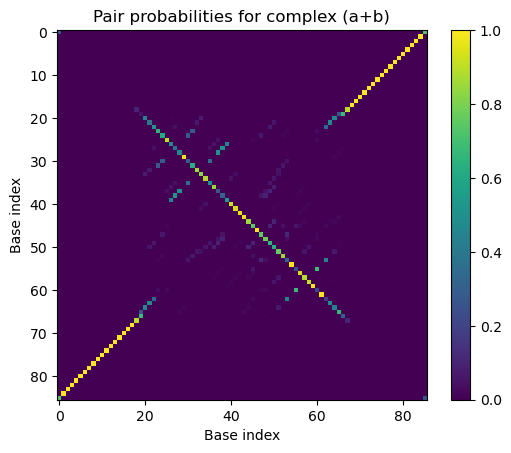

In [6]:
# Plot the equilibrium pair probability matrix for bipedal walker complex '(a+b)'
import matplotlib.pyplot as plt
plt.imshow(walker_result.pairs.to_array())
plt.xlabel('Base index')
plt.ylabel('Base index')
plt.title('Pair probabilities for complex (a+b)')
plt.colorbar()
plt.clim(0, 1)

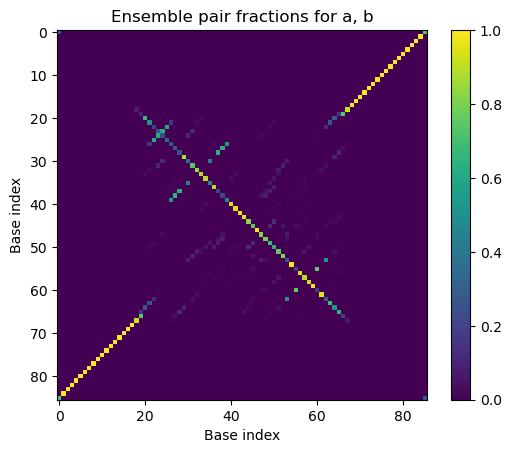

In [7]:
# Plot the ensemble pair fractions for the tube 
plt.imshow(tube_result[t1].ensemble_pair_fractions.to_array())
plt.xlabel('Base index')
plt.ylabel('Base index')
plt.title('Ensemble pair fractions for ' + ', '.join(s.name for s in t1.strands))
plt.colorbar()
plt.clim(0, 1)